In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv 


%matplotlib inline

median wait time: 0.8256


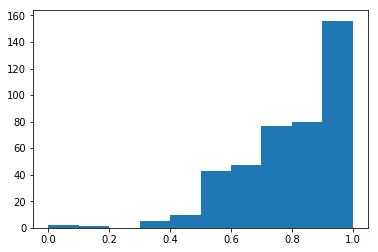

In [2]:
target = 'percenttreat_62days'
cutoff = 0.85
inputs = ['beds_day', 'beds_night', 
          '_Anaesthetics', '_Clinical_oncology', '_Emergency_Medicine', 
          '_General_medicine_group', '_Radiology_group', '_Surgical_group',
          '_Nurse_HealthVisitors', '_Support_Clinical', '_Support_STT',
          'ytd_plan', 'ytd_plan_miss', 'deficit']

inputs.extend(['clinstaff_grade%d' % i for i in range(1,11)])

X = []
y = []
raw_wait_pct = []

with open('nhs_62daywait_1617q4.csv') as f:
    for row in csv.DictReader(f):
        raw_wait_pct.append(float(row[target]))
        y.append(float(row[target]) >= cutoff)
        X.append([float(row[col] or 0.0) for col in inputs])

y = np.array(y)
X = np.array(X)


plt.hist(raw_wait_pct);
print "median wait time:", np.median(raw_wait_pct)


In [3]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression

model = LogisticRegression(penalty='l2')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
print "baseline accuracy (always guess 'made target'):", np.mean(1.0 == y)
print "baseline accuracy (always guess 'missed target'):", np.mean(0.0 == y)
print "model accuracy:", np.mean((model.predict(X) > 0.5) == y)
print "-> number of non-zero terms:", np.sum(np.abs(model.coef_) > 0.0)

dict(zip(inputs, model.coef_[0].tolist()))

baseline accuracy (always guess 'made target'): 0.46080760095
baseline accuracy (always guess 'missed target'): 0.53919239905
model accuracy: 0.596199524941
-> number of non-zero terms: 24


{'_Anaesthetics': -0.0037598535802690564,
 '_Clinical_oncology': -0.006582342056552477,
 '_Emergency_Medicine': 0.00599125495566846,
 '_General_medicine_group': 0.0037510415604663973,
 '_Nurse_HealthVisitors': -0.0006256481956659791,
 '_Radiology_group': 0.0055271684174136755,
 '_Support_Clinical': 0.0005411502423963392,
 '_Support_STT': 0.00010318070337518448,
 '_Surgical_group': 0.006643311138831733,
 'beds_day': -0.0019497396242200598,
 'beds_night': 0.0005653829040596452,
 'clinstaff_grade1': -0.011506468832824829,
 'clinstaff_grade10': 0.12517373552741998,
 'clinstaff_grade2': -0.006353030496733641,
 'clinstaff_grade3': -0.002252985900113592,
 'clinstaff_grade4': -0.005989419808605788,
 'clinstaff_grade5': 0.004080435083965688,
 'clinstaff_grade6': 0.005384448400791513,
 'clinstaff_grade7': 0.00040374418552773997,
 'clinstaff_grade8': -0.007910001570130897,
 'clinstaff_grade9': -0.05790076536203989,
 'deficit': -0.3691792082065331,
 'ytd_plan': -7.575053138007937e-07,
 'ytd_plan_m

In [5]:
model = LogisticRegression(penalty='l1', C=0.001)
model.fit(X, y)

print "baseline accuracy (always guess 'made target'):", np.mean(1.0 == y)
print "baseline accuracy (always guess 'missed target'):", np.mean(0.0 == y)
print "alternative (sparse) model accuracy:", np.mean((model.predict(X) > 0.5) == y)
print "-> number of non-zero terms:", np.sum(np.abs(model.coef_) > 0.0)

dict(zip(inputs, model.coef_[0].tolist()))

baseline accuracy (always guess 'made target'): 0.46080760095
baseline accuracy (always guess 'missed target'): 0.53919239905
alternative (sparse) model accuracy: 0.536817102138
-> number of non-zero terms: 3


{'_Anaesthetics': 0.0,
 '_Clinical_oncology': 0.0,
 '_Emergency_Medicine': 0.0,
 '_General_medicine_group': 0.0,
 '_Nurse_HealthVisitors': -0.00021448238330262832,
 '_Radiology_group': 0.0,
 '_Support_Clinical': 0.0,
 '_Support_STT': 0.0,
 '_Surgical_group': 0.0,
 'beds_day': 0.0,
 'beds_night': 0.0001489124698021603,
 'clinstaff_grade1': 0.0,
 'clinstaff_grade10': 0.0,
 'clinstaff_grade2': 0.0,
 'clinstaff_grade3': 0.0,
 'clinstaff_grade4': 0.0,
 'clinstaff_grade5': 0.0,
 'clinstaff_grade6': 0.0,
 'clinstaff_grade7': 0.0,
 'clinstaff_grade8': 0.0,
 'clinstaff_grade9': 0.0,
 'deficit': 0.0,
 'ytd_plan': -7.0738755049191e-07,
 'ytd_plan_miss': 0.0}

## This is worse than a constant baseline.